In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def plot_commonest_feats(df, filename=False, save=False):
    traj_list = list(df['trajectory'])
    traj_list = [ast.literal_eval(pathway) for pathway in traj_list]
    counter = Counter(traj_list[0])
    for i in traj_list[1:]:
        counter.update(i)
    counter_df = pd.DataFrame.from_dict(counter, orient='index', columns=['frequency']).reset_index()
    plt.figure(figsize=(8, 8))
    sns.barplot(x='index', y='frequency', data=counter_df)
    plt.title('Frequency of features in pathways')
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Id', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    if save:
        plt.savefig(f'../pathways/21_jan/commonest_{filename}.png')
    plt.show()
    plt.close()

In [7]:
def generate_filename(i):
    lupus_classes = ['No lupus', 'Lupus']
    lupus_class = lupus_classes[i]
    filename = lupus_class.lower().replace(' ', '_').replace('/','_')
    return filename

#### Entire test df

In [8]:
test_df = pd.read_csv('../test_dfs/21_jan/dqn_test_df_13000000.csv')
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,score,is_success
0,0.0,17.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",0.0,14.0,1.0
1,1.0,18.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,17.0,True
2,2.0,19.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,17.0,True
3,3.0,18.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,13.0,True
4,4.0,18.0,1.0,0.0,0.0,"['cutaneous_lupus', 'delirium', 'low_c3', 'joi...",False,2.0,True


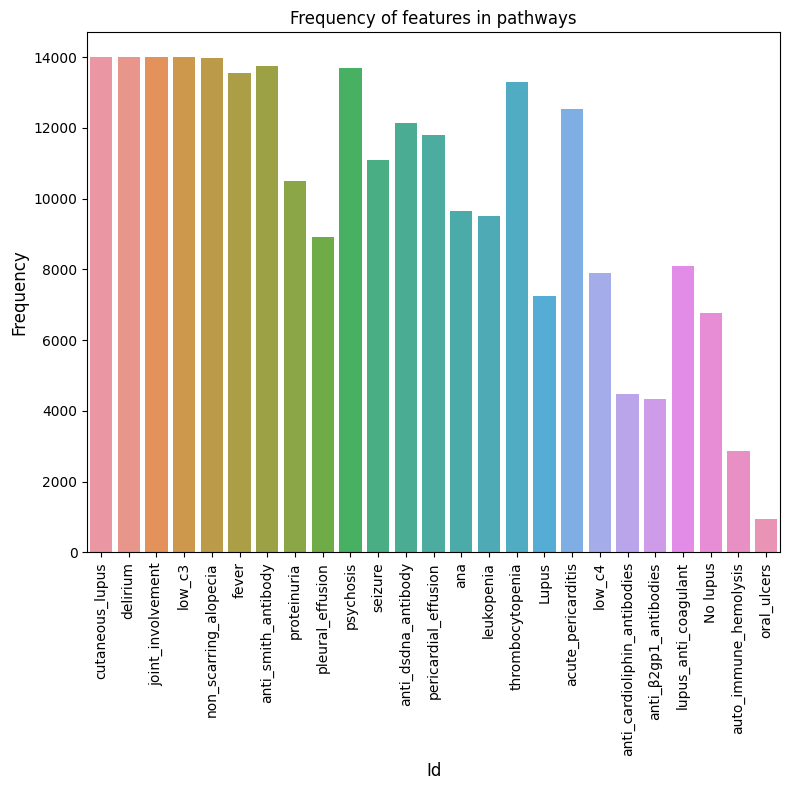

In [9]:
plot_commonest_feats(test_df, filename='test_df', save=True)

#### success_df

In [12]:
success_df = pd.read_csv('../test_dfs/21_jan/dqn_success_df_13000000.csv')

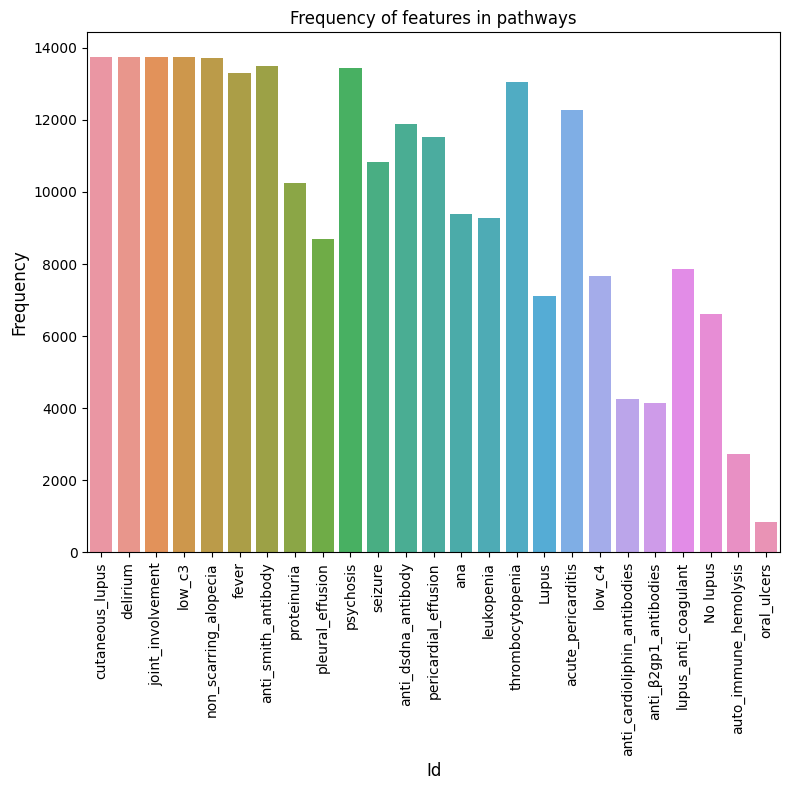

In [13]:
plot_commonest_feats(success_df, filename='success_df', save=True)

#### The lupus classes

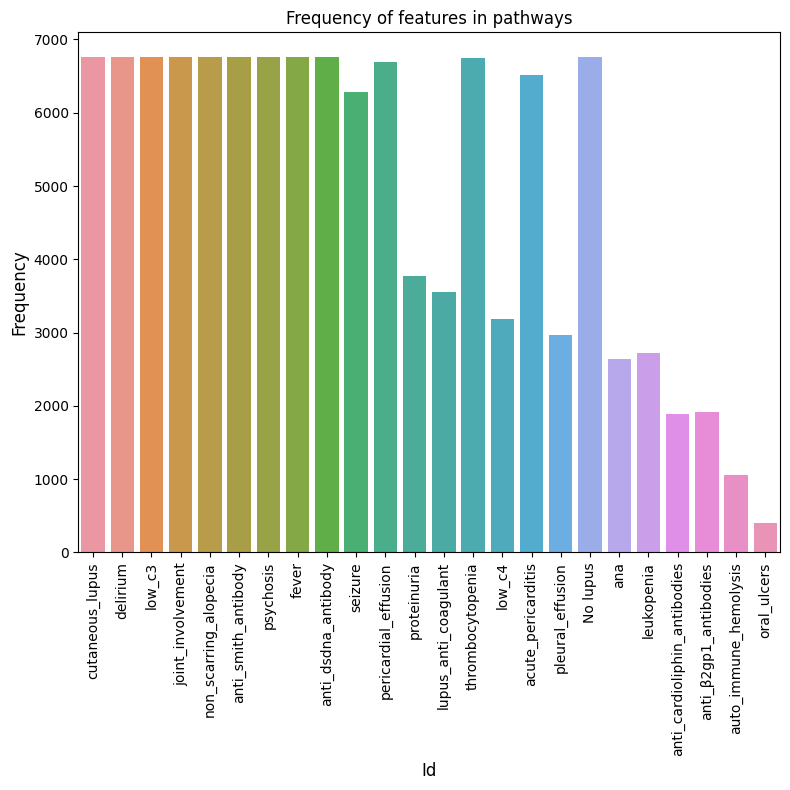

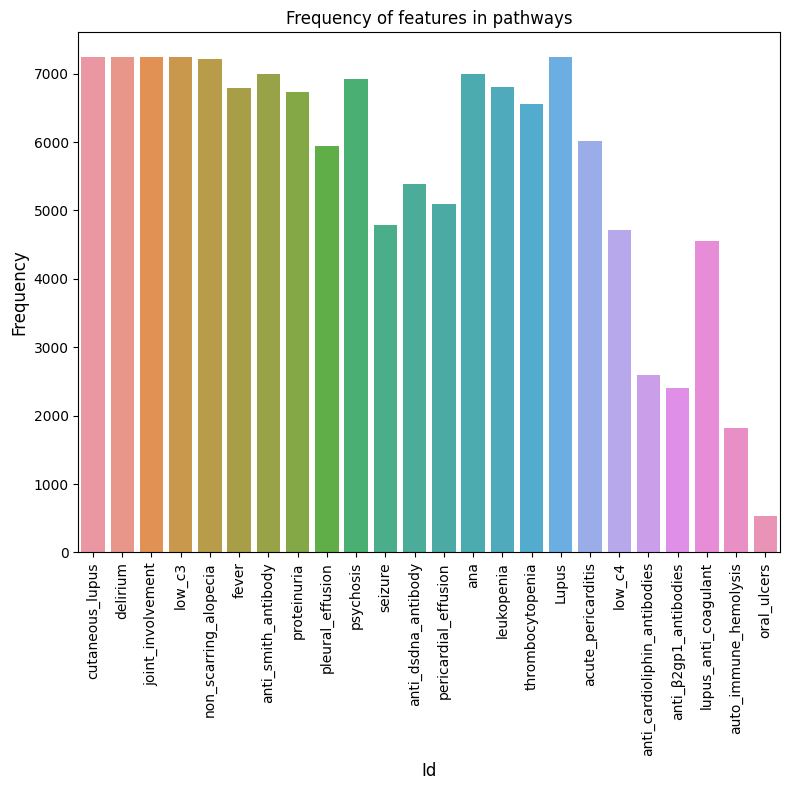

In [14]:
for i in range(2):
    lupus_df = test_df[test_df.y_pred==i]
    if len(lupus_df!=0):
        plot_commonest_feats(lupus_df, filename=generate_filename(i), save=True)